In [1]:
import pandas as pd
from collections import Counter

In [2]:
region = ''
df = pd.read_csv(f'../data/crunchbase-aggregated/{region}1000-gender.csv')

In [3]:
# df.head(3)

## industry groups

### get all the industry groups and counts

In [4]:
industry_full = []
for i in range(1000):
    industry_list_raw = df['Industry Groups'].str.split(';')[i]
    industry_list = [industry_name.strip() for industry_name in industry_list_raw]
    industry_full += industry_list

In [5]:
industry_counts = Counter(industry_full)

### get unique set of industry groups

In [6]:
industry_groups = industry_counts.keys()

In [7]:
len(industry_groups)

47

## female companies

see how many kind of female distribution in comapanies we have

In [8]:
# df['gender'].value_counts()

number of female founders in company

In [9]:
# df['#female'].value_counts()

percentage of female in company

In [10]:
# (df['#female']/df['#founders']).value_counts().sort_index(ascending=False)

## industry groups + female companies

In [11]:
industry_female = []
industry_not_female = []
for i in range(1000):
    industry_list_raw = df['Industry Groups'].str.split(';')[i]
    industry_list = [industry_name.strip() for industry_name in industry_list_raw]
    if (df['#female'][i] != 'N/A') and (df['#female'][i] > 0):
        industry_female += industry_list
    else:
        industry_not_female += industry_list

In [12]:
# Counter(industry_female).most_common()

In [13]:
# Counter(industry_not_female).most_common()

In [14]:
df_compare = pd.DataFrame({'#female_co': Counter(industry_female),
                           '#not_female_co': Counter(industry_not_female)})

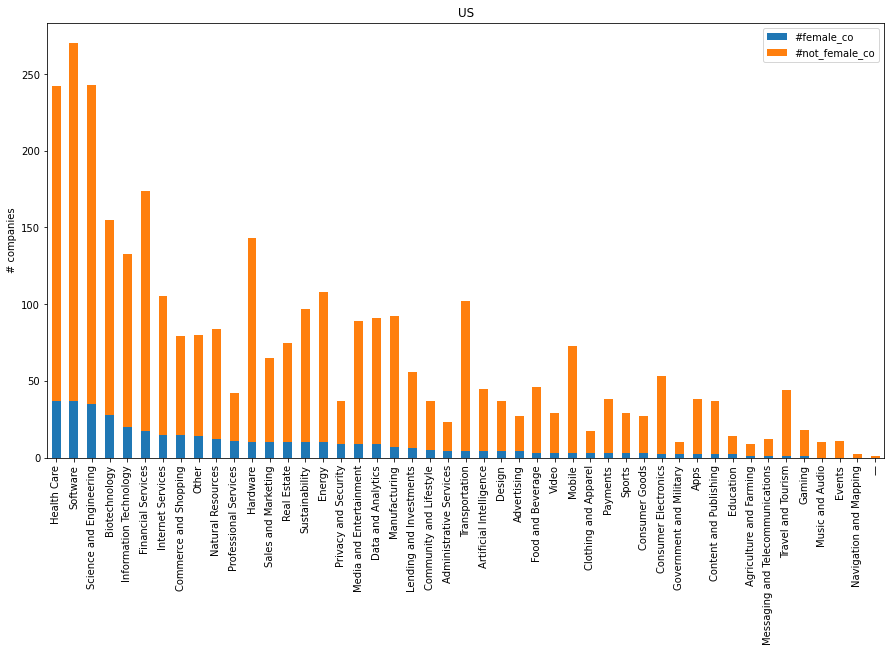

In [15]:
df_compare \
.sort_values(by='#female_co', ascending=False) \
.plot.bar(stacked=True, 
          figsize=(15,8),
          ylabel='# companies',
          title=region);

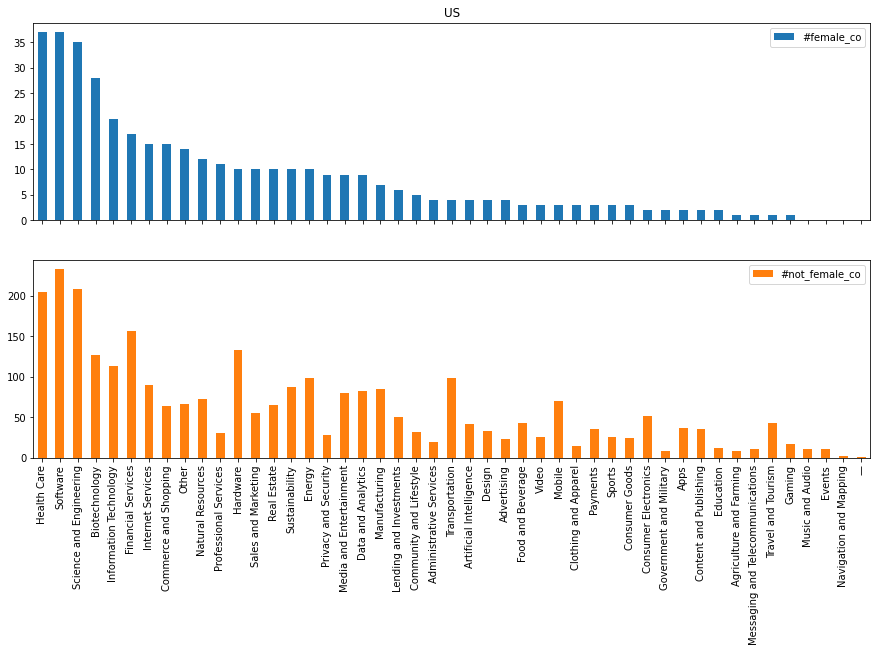

In [16]:
df_compare \
.sort_values(by='#female_co', ascending=False) \
.plot.bar(subplots=True, figsize=(15,8), title=[region,'']);

*note* counts: if a company has at least one female founder make it female company and compare to male

In [17]:
df_metrics = pd.DataFrame({'#companies': industry_counts, 
                           '#female_co': Counter(industry_female)})

In [18]:
# df_metrics['#companies'].sum()

In [19]:
# df_metrics['#female_co'].sum()

In [20]:
# df_metrics['%companies'] = df_metrics['#companies']/df_metrics['#companies'].sum()*100
# df_metrics['%female_co'] = df_metrics['#female_co']/df_metrics['#companies'].sum()*100

In [21]:
df_metrics['%female'] = df_metrics['#female_co']/df_metrics['#companies']*100

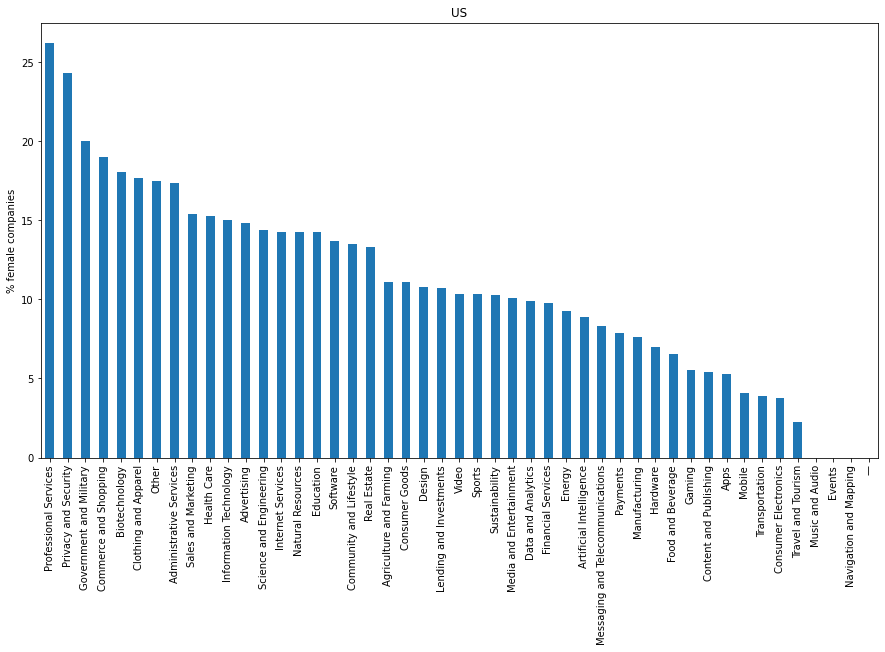

In [22]:
df_metrics['%female'] \
.sort_values(ascending=False) \
.plot.bar(figsize=(15,8), 
          ylabel='% female companies', title=region);

In [23]:
df_metrics['%not_female'] = 100-df_metrics['%female']

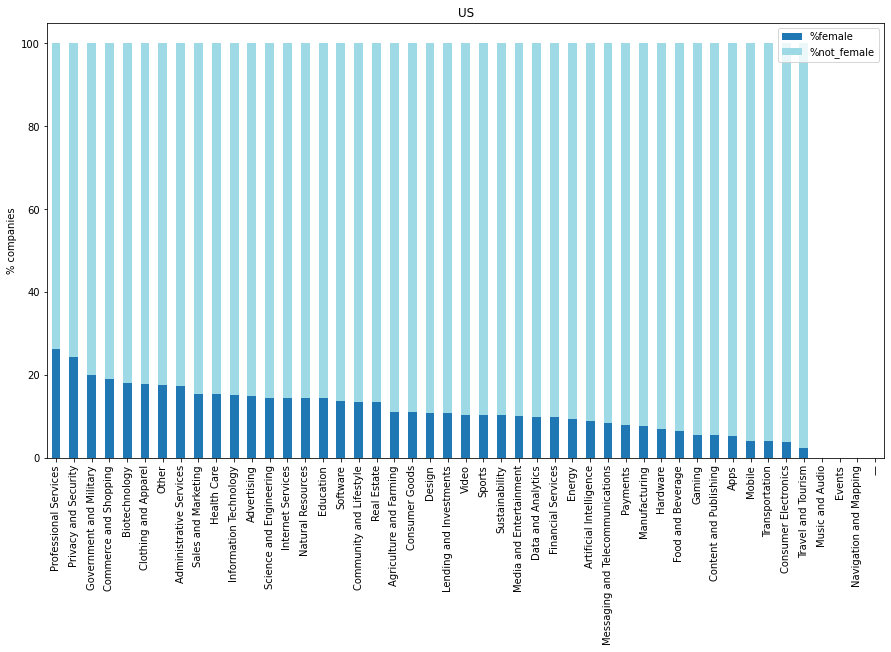

In [24]:
df_metrics[['%female', '%not_female']] \
.sort_values(by=['%female'], ascending=False) \
.plot.bar(stacked=True,
          figsize=(15,8), colormap='tab20',
          ylabel='% companies', title=region);